In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [2]:
#Load the file
df = pd.read_csv("../data/localisation_darty.csv", index_col = False, sep = ';')
print(len(df))
df.head()

360


,adresse,code postal,nom,longitude,latitude
0,41 rue Saint Vulfran,80100 ABBEVILLE,DARTY ABBEVILLE,1.830259,50.104630
1,ZAC Agen Sud Centre Commercial du Midi,47000 AGEN,DARTY AGEN,0.617310,44.184696
2,Parc Commercial de la Tremblaye,50180 AGNEAUX,DARTY SAINT LO,-1.131453,49.109152
3,787 Route de Nimes,30220 AIGUES-MORTES,DARTY AIGUES MORTES,4.196902,43.575915
4,ZAC de la Pioline Les Milles,13290 AIX EN PROVENCE,DARTY AIX-EN-PROVENCE,5.401146,43.506644


In [3]:
#Create a GeoDataFrame
GPS = 'epsg:4326'
crs = {'init': GPS}
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

gdf = gpd.GeoDataFrame(df,crs=crs, geometry=geometry)
print(len(gdf))
gdf.head()

360


,adresse,code postal,nom,longitude,latitude,geometry
0,41 rue Saint Vulfran,80100 ABBEVILLE,DARTY ABBEVILLE,1.830259,50.104630,POINT (1.8302585 50.1046295)
1,ZAC Agen Sud Centre Commercial du Midi,47000 AGEN,DARTY AGEN,0.617310,44.184696,POINT (0.6173103 44.184696)
2,Parc Commercial de la Tremblaye,50180 AGNEAUX,DARTY SAINT LO,-1.131453,49.109152,POINT (-1.131453 49.109152)
3,787 Route de Nimes,30220 AIGUES-MORTES,DARTY AIGUES MORTES,4.196902,43.575915,POINT (4.196902400000001 43.5759151)
4,ZAC de la Pioline Les Milles,13290 AIX EN PROVENCE,DARTY AIX-EN-PROVENCE,5.401146,43.506644,POINT (5.4011455 43.5066435)


In [4]:
france = gpd.read_file("../data/communes-20180101-shp/communes-20180101.shp")

In [5]:
def get_x(geometry):
    return geometry.x

def get_y(geometry):
    return geometry.y

In [6]:
france['centroid'] = france.centroid
france['longitude'] = france['centroid'].apply(get_x)
france['latitude'] = france['centroid'].apply(get_y)
print(len(france))
france.head()

35363


,insee,nom,wikipedia,surf_ha,geometry,centroid,longitude,latitude
0,64485,Saint-Jean-Pied-de-Port,fr:Saint-Jean-Pied-de-Port,275.0,"POLYGON ((-1.24657002121667 43.16976078874197,...",POINT (-1.234998378505492 43.15957612555527),-1.234998,43.159576
1,64166,Çaro,fr:Çaro,402.0,POLYGON ((-1.240565232699973 43.14755828321206...,POINT (-1.220253961463574 43.14895518121502),-1.220254,43.148955
2,64155,Bustince-Iriberry,fr:Bustince-Iriberry,568.0,POLYGON ((-1.203554912488834 43.18323460352974...,POINT (-1.184695063687112 43.18778697942476),-1.184695,43.187787
3,64297,Lacarre,fr:Lacarre,439.0,POLYGON ((-1.177592343136382 43.18467039831046...,POINT (-1.161954319764809 43.18729262103316),-1.161954,43.187293
4,64247,Gotein-Libarrenx,fr:Gotein-Libarrenx,1185.0,POLYGON ((-0.9153178771651082 43.1911900014023...,POINT (-0.889071903583428 43.19172330924125),-0.889072,43.191723


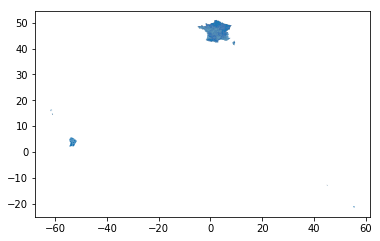

In [7]:
france.plot()
plt.show()

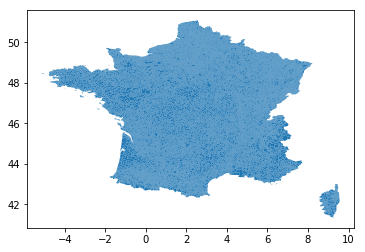

In [8]:
france = france[france['latitude'] > 40]
ax = france.plot()
plt.show()

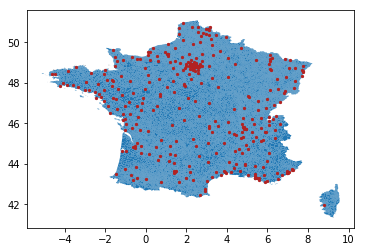

In [9]:
plot = gdf.plot(ax = ax, marker='o', color='firebrick', markersize=5)
img = plot.get_figure()
img

In [10]:
img.savefig('../data/darty_en_france.png')

In [ ]:
#If I want to convert longitude and latitude into another format e.g. Lambert II
#lambertII = 'epsg:27572'
#gdf = gdf.to_crs({'init': lambertII})